# 	项目3 波士顿房价预测：前馈神经网络
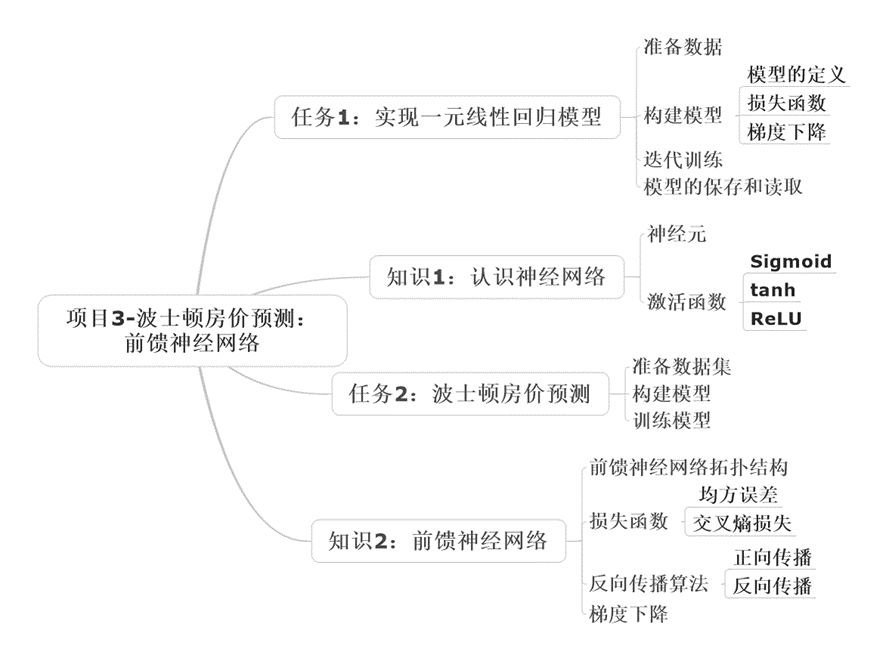

## 	任务1：实现一元线性回归模型
假设有一组数据集，其y和x的对应关系为
y=wx+b
本实例就是让单输入神经元线性模型学习这些样本，并能够找到其中的规律，即利用现有的数据训练出理想的w和b的值，然后建立模型，进行下一个值的预测。
深度学习有如下4个步骤：
- 准备数据
- 搭建模型
- 迭代训练
- 使用模型

线性回归就是利用一曲线段对一些连续的数据进行拟合，进而可以用这条曲线预测新的输出值。只有一个自变量的情况称为简单回归，大于一个自变量的情况叫作多元回归或者N元回归。
模型被定义成:
$$
\begin{aligned}
 f(x; w, b) = x^\top w + b
\end{aligned}
$$


### 1 准备数据
深度学习数据集一般划分为训练集(training set)、验证集(validation set)、测试集(test set)。训练集用于训练模型或者确定模型参数，验证集用于控制模型复杂度或者确定模型结构，测试集用于测试模型的性能和泛化能力。一元线性回归模型结构非常简单，所以只需要准备训练集。
使用一个简单的一元函数模型作为待测定的模型基础，公式为
$$ 
Y = 3X +3.17
$$



In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
train_x = tf.random.normal(shape=[100,1]).numpy()
noise = tf.random.normal(shape=[100,1]).numpy()
train_y = 3 * train_x + 3.17 + noise

In [ ]:
plt.scatter(train_x,train_y)

### 2 构建模型

1)模型的定义

现在模型是一个一元线性函数，使用 TensorFlow 提供的 tf.Variable 随机初始化参数 weight 和 bias。现在需要求合适 weight 和 bias，使其很好地拟合训练数据，可以将其拟合直线绘制到样本散点图中。weight 与 bias 初始化为0，形状是一维的数字。
目标函数非常简单，即
$$ 
ypred = weight * trainx + bias
$$ 

weight [weɪt]

bias ['baɪəs] 

predict [prɪ'dɪkt] 

In [ ]:
w = tf.Variable(initial_value=0)
b = tf.Variable(initial_value=0)
variable=[w,b]
ypred = w*train_x +b

2)损失函数

然后定义线性回归使用到的损失函数，这里使用线性回归问题中常用的均方差损失函数(MSE)。

$ loss = {MSE} = \frac{1}{m} \sum_i ( \hat{y}^{} - y^{})_i^2 $

$\hat{y}^{}$ 表示模型在测试集上的预测值,$y^{}$表示回归目标向量，损失函数决定着对于数据从空间中的那个角度去拟合真实数据。

In [ ]:
loss = tf.reduce_sum(tf.square(ypred-train_y))

3)梯度下降

神经网络在训练的过程中先通过正向生成一个值y_pred，然后观察其与真实值train_y的差距loss，再通过反向过程将里面的参数进行调整，接着再次正向生成预测值并与真实值进行比对，这样循环下去，直到将参数调整为合适值为止。因此首先需要计算参数的梯度，然后使用梯度下降法来更新参数。

代码如下：
声明梯度下降优化器

optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4) 

TensorFlow自动计算损失函数关于自变量（模型参数）的梯度

grads = tape.gradient(loss, variables)

TensorFlow自动根据梯度更新参数

optimizer.apply_gradients(grads_and_vars=zip(grads, variables))


optimizer  ['ɑːptɪmaɪzər]

gradients ['ɡreɪdiənt] 


### 3 迭代训练

设定模型迭代训练次数num_epoch为10000，每一步训练都需要填充全部的训练数据。模型参数weight与bias会不断的更新，所以同样的训练集上每一步计算出的损失值都不同。在程序中加入输出日志，以便观察参数与损失值得变化。


训练结束后输出模型最终的参数，并绘制图形。


In [ ]:
weight = tf.Variable(initial_value=0.)
bias = tf.Variable(initial_value=0.)
variables = [weight, bias]

num_epoch = 100
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = weight * train_x + bias
        loss = tf.reduce_sum(tf.square(y_pred - train_y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
    if e % 10 == 0:
        print('loss [{:.3f}], W/b [{:.3f}/{:.3f}]'.format
              (loss,float(weight.numpy()),float(bias.numpy())))
print('Linear Regression Model: Y=[{:.3f}]*X + [{:.3f}]'.format
              (float(weight.numpy()),float(bias.numpy())))
plt.scatter(train_x, train_y)
plt.plot(train_x,(weight * train_x + bias),c='r')


### 4 模型的保存和读取
TensorFlow 提供了统一模型导出格式 SavedModel，可以将训练好的模型可以以这一格式为中介，在多种不同平台上部署，这是TensorFlow 2中主要使用的导出格式。

## 3.2 认识神经网络
深度学习是基于神经网络发展起来的技术，而神经网络的发展具有悠久的历史，且发展历程可谓一波三折。神经网络历经两次潮起潮落后，迎来了它的第三次崛起。人们对神经网络的研究可以追溯到20世纪40年代，并且第一次热潮持续到了20世纪60年代末。1943年，美国神经生理学家沃伦·麦卡洛克(Warren McCulloch)和数学家沃尔特·皮茨(Walter Pitts )对生物神经元进行建模，首次提出了一种形式神经元模型。1957年弗兰克·罗森布拉特(Frank Rosenblatt)提出的感知器（Perceptron）。它可以被视为一种最简单形式的前馈神经网络，是一种二元线性分类器。但这种回路一直无法被神经网络处理，直到1975年保罗·韦伯斯(Paul Werbos)创造了反向传播算法(Backpropagation，缩写为BP)。反向传播算法有效地解决了异或的问题，还有更普遍的训练多层神经网络的问题。

### 1. 神经元

大脑主要计算单元被称为神经元。在人类的神经系统中发现大约有1000亿个神经元。一个神经元通常具有多个树突，主要用来接受传入信息；而轴突只有一条，轴突尾端有许多轴突末梢可以给其他多个神经元传递信息。轴突末梢跟其他神经元的树突产生连接，从而传递信号。这个连接的位置在生物学上叫做“突触”。

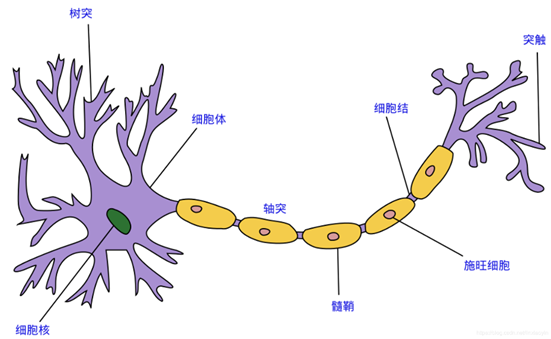

感知器使用特征向量来表示的前馈神经网络，它是一种二元分类器，把矩阵上的输入$x$（实数值向量）映射到输出值$f(x)$上（一个二元的值）。
$$
f(x) = 
\begin{cases}
1, &if\ w *x+b>0\\
0, &if\ else
\end{cases}
$$

$w$是实数的表示权重的向量，$b$是偏置，一个不依赖于任何输入值的常数。偏置可以认为是激励函数的偏移量，或者给神经元一个基础活跃等级。

$f(x)$（0或1）用于对$x$进行分类，看它是肯定的还是否定的，这属于二元分类问题。由于输入直接经过权重关系转换为输出，所以感知器可以被视为最简单形式的前馈式人工神经网络。

设有n维输入的单个感知机，${a}_{1}$至${a}_{n}$为n维输入向量的各个分量，${w}_{1}$至${w}_{n}$为各个输入分量连接到感知机的权量（或称权值），${b}$为偏置，$f(.)$为激活函数（又曰激励函数或传递函数），$O$为标量输出。输出$O$的数学描述为：
$$
O= f(\sum_{i=0}^n w_i x_i + b_i)
$$

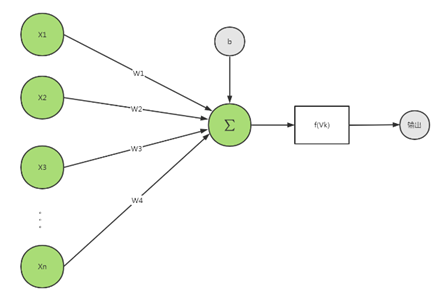


### 激活函数

一个神经元接收到信息之后，只是加权求和，然后把输出给下一个神经元吗？事实上，生物体内的神经元接受信息之后并不一定被激活，而是判断这个信息是否达到了一个阈值。如果信息的值并没有达到这个阈值，神经元就处于抑制状态，否则，神经元被激活，并将信息传递给下一个神经元。
神经元的另一个重要部分是激活函数，激活函数的本质是向神经网络引入非线性因素，使得神经网络可以拟合各种曲线。因为激活函数是非线性函数，从而神经网络的输出不再是输入的线性组合，而是几乎可以逼近任意函数，也就增强了神经网络的表达能力。

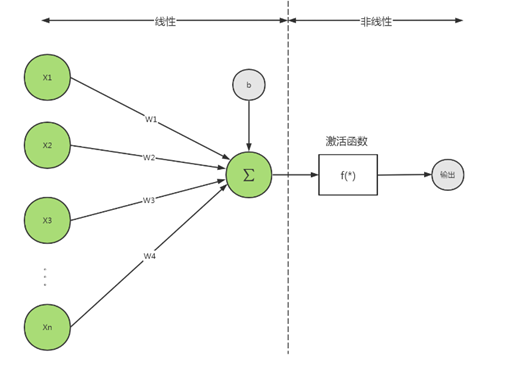




#####  1.逻辑函数Sigmoid

逻辑函数（logistic function）是一个在生物学中常见的S型函数，也称为S型生长曲线。它是皮埃尔·弗朗索瓦·韦吕勒在1844或1845年在研究它与人口增长的关系时命名的。公式如下:

$$
f(x) = \sigma = \frac{1}{1+e^{-x}}= \text{number between 0 and 1}
$$


In [ ]:
def set_figsize(figsize=(3.5, 2.5)):
    %config InlineBackend.figure_format = 'svg'
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

def xyplot(x_vals, y_vals, name):
    set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.numpy(), y_vals.numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

In [ ]:
x = tf.Variable(tf.range(-10,10,0.1),dtype=tf.float32)
y = tf.nn.sigmoid(x)
xyplot(x, y, 'sigmoid')

依据链式法则，sigmoid函数的导数


$$
sigmoid'(x)=sigmoid(x)(1−sigmoid(x)).
$$
下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

In [ ]:
with tf.GradientTape() as t:
    t.watch(x)
    y=y = tf.nn.sigmoid(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of sigmoid')

Sigmoid函数的特点是会把输出限定在(0,1)之间，如果是非常大的负数，输出就是0，如果是非常大的正数，输出就是1。

Sigmod有两个主要缺点：
一、是Sigmoid容易过饱和，丢失梯度。从Sigmoid函数图像可以看到，神经元的活跃度在0和1处饱和，梯度接近于0，这样在反向传播时，很容易出现梯度消失的情况。
二、是Sigmoid的输出均值不是0。

#### 2.双曲正切函数tanh

双曲正切函数是双曲函数的一种。在数学中，双曲函数是一类与常见的三角函数类似的函数。最基本的双曲函数是双曲正弦函数 $sinh$和双曲余弦函数$cosh$，从它们可以导出双曲正切函数 $tanh$。形状上类似于Sigmoid函数，但是它的中心位置是 0，其范围是从 (-1,1)。公式如下：

$$
f(x)=\tanh(x)={\frac {(e^{x}-e^{-x})}{(e^{x}+e^{-x})}}
$$

In [ ]:
x = tf.Variable(tf.range(-10,10,0.1),dtype=tf.float32)
y = tf.nn.tanh(x)
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数
$$
tanh'(x)=1−tanh^{2}(x)
$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。


In [ ]:
with tf.GradientTape() as t:
    t.watch(x)
    y=y = tf.nn.tanh(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of tanh')

3. 线性整流函数ReLU

线性整流函数(ReLU),又称修正线性单元, 是一种人工神经网络中常用的激活函数，通常指代以斜坡函数及其变种为代表的非线性函数。

比较常用的线性整流函数有斜坡函数，公式如下：
$$f(x)=\max(0,x)$$


In [ ]:
x = tf.Variable(tf.range(-10,10,0.1),dtype=tf.float32)
y = tf.nn.relu(x)
xyplot(x, y, 'ReLU') 

当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

In [ ]:
with tf.GradientTape() as t:
    t.watch(x)
    y=y = tf.nn.relu(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of relu')

### 激活函数优缺点:
* 阈值激活函数用于原始的感知机。它是不可微的，在 x=0 时是不连续的。因此，使用这个激活函数来进行基于梯度下降或其变体的训练是不可能的。
* Sigmoid 激活函数一度很受欢迎，从曲线来看像一个连续版的阈值激活函数。它受到梯度消失问题的困扰，即函数的梯度在两个边缘附近变为零。这使得训练和优化变得困难。
* 双曲正切激活函数在形状上也是 S 形并具有非线性特性。该函数以 0 为中心，与 Sigmoid 函数相比具有更陡峭的导数。与 Sigmoid 函数一样，它也受到梯度消失问题的影响。
* ReLU 激活函数是线性激活功能的整流版本，这种整流功能允许其用于多层时捕获非线性。使用 ReLU 的主要优点之一是导致稀疏激活。在任何时刻，所有神经元的负的输入值都不会激活神经元。就计算量来说，这使得网络在计算方面更轻便。ReLU 神经元存在死亡 ReLU 的问题，也就是说，那些没有激活的神经元的梯度为零，因此将无法进行任何训练，并停留在死亡状态。尽管存在这个问题，但 ReLU 仍是隐藏层最常用的激活函数之一。


##	3.3  波士顿房价预测

在现实生活中回归问题通常是用来预测一个连续值。连续值预测问题是非常常见的，比如股价的走势预测、天气预报中温度和湿度等的预测、年龄的预测、交通流量的预测等。对于预测值是连续的实数范围，或者属于某一段连续的实数区间。例如一个产品的实际价格为500元，通过回归分析预测值为499元，我们认为这是一个比较好的回归分析。一个比较常见的回归算法是线性回归算法（Linear Regression，简称LR），使用线性模型去逼近真实模型。另外，回归分析用在神经网络上，其最上层是不需要加上softmax函数的，而是直接对前一层累加即可。回归是对真实值的一种逼近预测。

本项目将使用波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过训练后的好的模型对对房屋的价格进行预测。房价显然和多个特征变量相关，不是一元线性回归问题，是多元线性回归问题，需选择多个特征变量来建立线性方程。回归问题的目标是预测连续值的输出，如价格或概率。不妨将此问题与分类问题进行对比，分类问题的目标是预测离散标签，例如某张照片中包含苹果还是橙子。

#### 1 准备数据集  
将构建一个模型，用于预测 20 世纪 70 年代中期波士顿郊区房价的中间值。为此需为该模型提供一些波士顿郊区房价相关的数据点，如犯罪率和当地的房产税率，数据集来自UCI机器学习知识库，于1978年开始统计，包括506个样本，每个样本包括12个特征变量和该地区的平均房价。

该数据集包含13个不同的特征：

|特征	 |说明	 |
| :----: | :---- |
| CRIM | 人均犯罪率 | 
| ZN   | 占地面积超过25000平方英尺的住宅用地所占的比例| 
| INDUS|  非零售商业用地所占的比例（英亩/城镇）| 
| CHAS | 查尔斯河虚拟变量（如果大片土地都临近查尔斯河，则为 1；否则为 0）| 
| NOX  |  一氧化氮浓度（以千万分之一为单位）| 
| RM   | 每栋住宅的平均房间数| 
| AGE  | 1940 年以前建造的自住房所占比例| 
| DIS  | 到 5 个波士顿就业中心的加权距离| 
| RAD  | 辐射式高速公路的可达性系数| 
| TAX  | 每 10000 美元的全额房产税率| 
| PTRATIO|  生师比（按城镇统计）| 
| B 1000 | 黑人所占的比例（按城镇统计）| 
| LSTAT | 较低经济阶层人口所占百分比| 

以上每个输入数据特征都有不同的范围。一些特征用介于 0 到 1 之间的比例表示，另外一些特征的范围在 1 到 12 之间，还有一些特征的范围在 0 到 100 之间，等等。真实的数据往往都是这样，了解如何探索和清理此类数据是一项需要加以培养的重要技能。

### 1. 下载并随机化处理训练集

##### Modules

- boston_housing module: Public API for tf.keras.datasets.boston_housing namespace.

- cifar10 module: Public API for tf.keras.datasets.cifar10 namespace.

- cifar100 module: Public API for tf.keras.datasets.cifar100 namespace.

- fashion_mnist module: Public API for tf.keras.datasets.fashion_mnist namespace.

- imdb module: Public API for tf.keras.datasets.imdb namespace.

- mnist module: Public API for tf.keras.datasets.mnist namespace.

- reuters module: Public API for tf.keras.datasets.reuters namespace.


In [8]:
boston_housing = keras.datasets.boston_housing
(train_data,train_labels), (test_data,test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

此数据集有506个样本，拆分为404个训练样本和 102 个测试样本，打印训练集与测试集大小，并输出以后训练集数据。

In [ ]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features
print(train_data[0]) 

使用pandas库显示数据集的前几行：

In [14]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.065409,-0.483615,1.028326,-0.256833,0.193295,-0.141177,0.537136,-0.348607,1.675886,1.565287,0.784476,0.448077,0.489842
1,-0.384997,-0.483615,-0.547479,-0.256833,-0.549357,0.231226,-1.946195,0.826369,-0.511142,-0.715530,0.511458,0.413820,-1.057312
2,0.230455,-0.483615,1.028326,-0.256833,1.157888,0.194550,0.967150,-1.017641,1.675886,1.565287,0.784476,0.448077,0.914930
3,1.770427,-0.483615,1.028326,-0.256833,1.217641,-2.678881,0.795145,-1.134670,1.675886,1.565287,0.784476,-0.733586,2.468985
4,-0.403559,3.097099,-1.523537,-0.256833,-1.257863,0.163517,-1.193670,2.686457,-0.856463,-0.559062,-0.535111,0.448077,-0.962081


标签是房价（以千美元为单位）。（您可能会注意到 20 世纪 70 年代中期的房价。）

In [ ]:
 # Display first 10 entries
print(train_labels[0:10]) 

#### 标准化特征
不同的评价指标往往具有不同的量纲（例如：对于评价房价来说量纲指：面积、房间数、楼层等；对于预测某个人患病率来说量纲指：身高、体重等。）和量纲单位（例如：面积单位：平方米、平方厘米等；身高：米、厘米等），这样的情况会影响到数据分析的结果，为了消除指标之间量纲的影响，需要进行数据标准化处理，已解决数据指标之间的可比性。

简单的举个例子：一张表有两个变量，一个是体重kg，一个是身高cm。假设体重这个变量均值为60（kg），身高均值为170（cm）。1，这两个变量对应的单位不一样，同样是100，对于身高来说很矮，但对于体重来说已经是超重了。另外，单位越小，数值越大，对结果的影响也越大，譬如170cm=1700mm。

数据的标准化(normalization)就是指将原始各指标数据按比例缩放，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权。数据标准化最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上。

原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。取值跨度大的特征数据就浓缩一下，跨度小的括展一下，使得他们的跨度尽量统一。

数据标准化的方法有很多种，常用的有min-max标准化、z-score标准化、log函数转换、atan函数转换、模糊量化法。

* z-score标准化：实现中心化和正态分布

z-Score标准化是基于原始数据的均值和标准差进行的标准化，其转化公式为：
$$
z=\frac {x-μ}{σ}
$$

其中$z$是转化后的数据，$x$为转化前的数据，$μ$是整组数据的均值，$σ$是整组数据的标准差。z-score适合大多数类型的数据，转化之后其均值将变为0，而方差和标准差将变为1，其应用非常广泛。

* Min-Max：归一化

Min-Max标准化方法会对原始数据进行线性变换，它的转换公式为：
$$
x_{new}=\frac {x-x_{min}}{x_{max}-x_{min}}
$$

班级最高189，最低150，我身高170

$$
x_{new}=\frac {170-150}{189-150} =0.51
$$

当x为最大值时，转换为1；当x为最小值时，转换为0；整组数据会分布在从0到1的区间内，而数据的分布形态并不会发生变化。

对数据集使用z-score标准化，对于每个特征，用原值减去特征的均值，再除以标准偏差即可，

In [9]:
mean = train_data.mean(axis=0)#按列计算均值
train_data -= mean#矩阵逐元素减法
std = train_data.std(axis=0)#按列计算标准差
train_data /= std#矩阵逐元素除法 
test_data -= mean
test_data /= std
print(train_data[0])  # First training sample, normalized

[ 0.06540908 -0.48361547  1.0283258  -0.25683275  0.19329471 -0.14117713
  0.53713618 -0.3486071   1.67588577  1.5652875   0.78447637  0.44807713
  0.48984243]


### 2 构建模型
多元线性回归的建模非常简单，在输入处增加特征点就可以解决，结果可以由不同特征的输入值和对应的权重相乘求和，加上偏置项计算求解。公式如下：
$$Y = x_1  w_1 + x_2 w_2 + … + x_n w_n + b$$
表示为矩阵形式为：
$$
\begin{bmatrix}x_1 & x_2 & …  & x_n\\ \end{bmatrix} *\begin{bmatrix}w_1 \\ w_2 \\ …  \\ w_n\\ \end{bmatrix} +b =  \begin{bmatrix}x_1w_1 +&x_2w_2 +& …  & +x_nw_n\\ \end{bmatrix} +b
$$

TensorFlow 2.0推荐使用 Keras(tf.keras)构建模型。Keras是一个广为流行的高级神经网络 API，简单、快速而不失灵活性，现已得到 TensorFlow 的官方内置和全面支持。

Keras 有两个重要的概念： 模型(Model) 和层(Layer) 。层将各种计算流程和变量进行了封装（例如基本的全连接层，CNN 的卷积层、池化层等），而模型则将各种层进行组织和连接，并封装成一个整体，描述了如何将输入数据通过各种层以及运算而得到输出。

In [20]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

 # optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer='Adam',
                metrics=['mae'])

  return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


序贯模型是多个网络层的线性堆叠，可以通过向Sequential模型传递一个layer的列表来构造该模型，或者通过.add()方法一个个的将layer加入模型中。

模型需要知道输入数据的shape，因此Sequential的第一层需要接受一个关于输入数据shape的参数，后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数。有几种方法来为第一层指定输入数据的shape：

* 传递一个input_shape的关键字参数给第一层，input_shape是一个tuple类型的数据，其中也可以填入None，如果填入None则表示此位置可能是任何正整数。数据的batch大小不应包含在其中。

* 有些2D层，如Dense，支持通过指定其输入维度input_dim来隐含的指定输入数据shape,是一个Int类型的数据。一些3D的时域层支持通过参数input_dim和input_length来指定输入shape。

* 如果你需要为输入指定一个固定大小的batch_size，可以传递batch_size参数到一个层中，例如你想指定输入张量的batch大小是32，数据shape是（6，8），则你需要传递batch_size=32和input_shape=(6,8)。

在训练模型之前，我们需要通过compile来对学习过程进行配置。compile接收三个参数：

* 优化器optimizer：该参数可指定为已预定义的优化器名，如rmsprop、adagrad，或一个Optimizer类的对象。

* 损失函数loss：该参数为模型试图最小化的目标函数，它可为预定义的损失函数名，如categorical_crossentropy、mse，也可以为一个损失函数。

* 指标列表metrics：对分类问题，我们一般将该列表设置为metrics=['accuracy']。指标可以是一个预定义指标的名字,也可以是一个用户定制的函数.指标函数应该返回单个张量。


### 3.训练模型

对该模型训练 500 个周期，并将训练和验证准确率记录到 history 对象中。

In [21]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])

Epoch 1/300
11/11 [==============================] - 0s 14ms/step - loss: 569.4427 - mae: 22.0635 - accuracy: 0.0000e+00 - val_loss: 537.5034 - val_mae: 21.3004 - val_accuracy: 0.0000e+00
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 521.5854 - mae: 20.9733 - accuracy: 0.0000e+00 - val_loss: 490.0273 - val_mae: 20.1983 - val_accuracy: 0.0000e+00
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 465.1991 - mae: 19.6443 - accuracy: 0.0000e+00 - val_loss: 430.6729 - val_mae: 18.7501 - val_accuracy: 0.0000e+00
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 396.3179 - mae: 17.8897 - accuracy: 0.0000e+00 - val_loss: 354.9517 - val_mae: 16.7742 - val_accuracy: 0.0000e+00
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 309.4312 - mae: 15.5116 - accuracy: 0.0000e+00 - val_loss: 265.4903 - val_mae: 14.0978 - val_accuracy: 0.0000e+00
Epoch 6/300
11/11 [==============================] - 0s 4ms/ste

使用 history 对象中存储的统计信息可视化模型的训练进度。

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,accuracy,val_loss,val_mae,val_accuracy,epoch
0,550.923157,21.467518,0.0,503.243622,20.310068,0.0,0
1,478.671051,19.706482,0.0,440.544861,18.716906,0.0,1
2,408.503967,17.897181,0.0,367.470459,16.805420,0.0,2
3,330.537476,15.798009,0.0,293.066589,14.645455,0.0,3
4,250.118637,13.466903,0.0,212.057526,12.004938,0.0,4


使用存储在 history 对象中的统计数据可视化模型的训练进度。通过这些数据可以判断：对模型训练多长时间之后它会停止优化。

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

如图所示，在大约 200 个周期之后，模型几乎不再出现任何改进。下面更新一下 model.fit 方法，以便在验证分数不再提高时自动停止训练。将使用一个回调来测试每个周期的训练状况。如果模型在一定数量的周期之后没有出现任何改进，则自动停止训练。

In [ ]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

现在看一下模型在测试集上的表现如何：

In [ ]:
print(test_data.shape,test_labels.shape)

In [22]:
accuracy = model.evaluate(test_data,test_labels, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 13.6977 - mae: 2.4920 - accuracy: 0.0000e+00


最后使用测试集中的数据预测房价,预测 MPG 值:

In [ ]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

## 	3.4前馈神经网络


给定一组神经元，通过将神经元作为节点来构建一个网络。不同的神经网络模型有着不同网络连接的拓扑结构，一种比较直接的拓扑结构是前馈网络。前馈神经网络(Feedforward Neural Network，FNN)是最早发明的简单人工神经网络，经常也称为多层感知器(Multi-Layer Perceptron， MLP)。

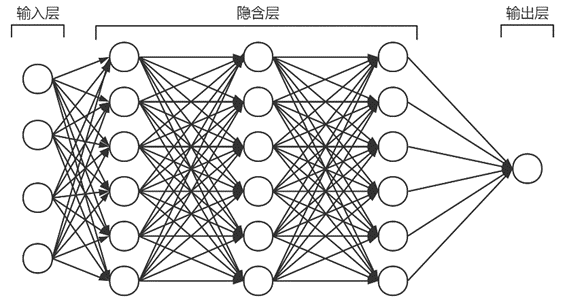

### 损失函数

损失函数（loss function）能够量化目标的实际值与预测值之间的差距。

通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。 
当样本i的预测值为 $ \hat{y}^{(i)}$，其相应的真实标签为$ y^{(i)}$时， 
平方误差可以定义为以下公式：

$$ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2. $$


均方根误差（RMSE）

$$ RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2} $$

平均误差（MAE :Mean Absolute Error）

$$ MAE = \frac{1}{N}\sum_{i=1}^N|\hat{y_i} - y_i| $$

标准差（SD :standard Deviation）

$$ SD = \frac{1}{N}\sum_{i=1}^N|y_i-\bar{y}| $$


$$ \bar{y} = \frac{1}{N}\sum_{i=1}^Ny_i $$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些（因为当我们对损失函数求导后常数系数为1）。
由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。为了进一步说明，来看下面的例子。 我们为一维情况下的回归问题绘制图像

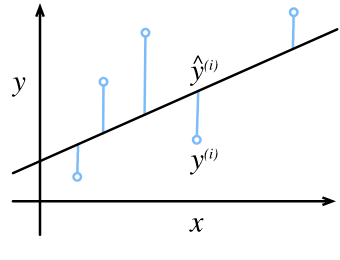

loss函数的作用是获得一个监督信号，引导模型更新参数，使模型能够将输入的数据映射到一个高维空间，最终完成分类或者回归的任务。而这个监督信号，就是两个样本空间分布之间的差异，我们想要达到的分布就是labels那样的分布，所以loss函数的输出就是两个分布之间的距离（在不同问题中，可以用不同的方式去表征这样一个距离）。

各种“距离”的应用场景简单概括为，空间：欧氏距离，路径：曼哈顿距离，国际象棋国王：切比雪夫距离，以上三种的统一形式:闵可夫斯基距离，加权：标准化欧氏距离，排除量纲和依存：马氏距离，向量差距：夹角余弦，编码差别：汉明距离，集合近似度：杰卡德类似系数与距离，相关：相关系数与相关距离


#### Module: tf.keras.losses

class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

class BinaryFocalCrossentropy: Computes the focal cross-entropy loss between true labels and predictions.

class CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.

class CosineSimilarity: Computes the cosine similarity between labels and predictions.

class Hinge: Computes the hinge loss between y_true and y_pred.

class Huber: Computes the Huber loss between y_true and y_pred.

class KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.

class LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.

class Loss: Loss base class.

class MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.

class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.

class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.

class Poisson: Computes the Poisson loss between y_true and y_pred.

class Reduction: Types of loss reduction.

class SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class SquaredHinge: Computes the squared hinge loss between y_true and y_pred.

#### 图像分类任务

我们希望根据图片动物的轮廓、颜色等特征，来预测动物的类别，有三种可预测类别：猫、狗、猪。假设我们当前有两个模型（参数不同），这两个模型都是通过sigmoid/softmax的方式得到对于每个预测结果的概率值：

模型1：

|预测|真实|是否正确|
|:----:|:---- :| :---- |
|0.3 0.3 0.4|0 0 1 (猪)|	正确|
|0.3 0.4 0.3|0 1 0 (狗)|	正确|
|0.1 0.2 0.7|1 0 0 (猫)|	错误|
模型1对于样本1和样本2以非常微弱的优势判断正确，对于样本3的判断则彻底错误。

模型2：

|预测|真实|是否正确|
|:----:| :---- :| :----  |
|0.1 0.2 0.7|0 0 1 (猪)|	正确|
|0.1 0.7 0.2|0 1 0 (狗)|	正确|
|0.3 0.4 0.3|1 0 0 (猫)|	错误|
模型2对于样本1和样本2判断非常准确，对于样本3判断错误，但是相对来说没有错得太离谱。

好了，有了模型之后，我们需要通过定义损失函数来判断模型在样本上的表现了，那么我们可以定义哪些损失函数呢？

#### Mean Squared Error (均方误差)
均方误差损失也是一种比较常见的损失函数，其定义为：
$$ MSE=\frac{1}{n}\sum_{i}^n(\hat{y_i}-y_i)^2 $$
模型1：

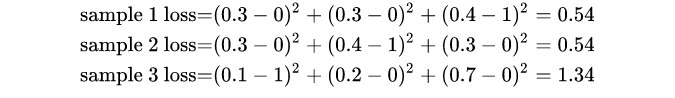

对所有样本的loss求平均：

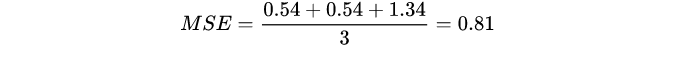

模型2：

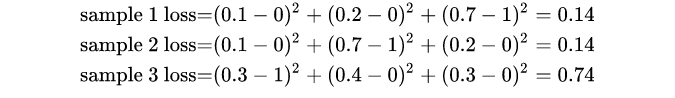

对所有样本的loss求平均：

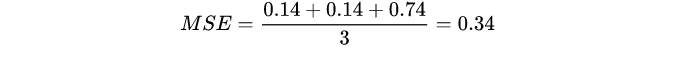

我们发现，MSE能够判断出来模型2优于模型1，那为什么不采样这种损失函数呢？主要原因是在分类问题中，使用sigmoid/softmx得到概率，配合MSE损失函数时，采用梯度下降法进行学习时，会出现模型一开始训练时，学习速率非常慢的情况（MSE损失函数）。

有了上面的直观分析，我们可以清楚的看到，对于分类问题的损失函数来说，分类错误率和均方误差损失都不是很好的损失函数，下面我们来看一下交叉熵损失函数的表现情况。

#### Cross Entropy Loss Function（交叉熵损失函数）

(1) 二分类
在二分的情况下，模型最后需要预测的结果只有两种情况，对于每个类别我们的预测得到的概率为$ p$ 和$1-p $，此时表达式为（$ log$ 的底数是$ e$）：

$$ L = \frac{1}{N}\sum_{i} L_i = \frac{1}{N}\sum_{i}-[y_i\cdot log(p_i) + (1-y_i)\cdot log(1-p_i)] $$

其中：
- $ y_i$—— 表示样本 $ i$的label，正类为 $ 1$ ，负类为 $ 0$
- $ p_i$—— 表示样本 $ i$ 预测为正类的概率

(2) 多分类
多分类的情况实际上就是对二分类的扩展：

$$ L = \frac{1}{N}\sum_{i} L_i = - \frac{1}{N}\sum_{i} \sum_{c=1}^My_{ic}\log(p_{ic})$$

其中：
-  $ M$ ——类别的数量
-  $ y_{ic}$——符号函数（ $ 0$ 或 $ 1$ ），如果样本$ i$ 的真实类别等于 $ c$ 取 $ 1$ ，否则取$ 0$
-  $ p_{ic}$——观测样本 $ i$属于类别$ c$ 的预测概率

现在我们利用这个表达式计算上面例子中的损失函数值：

模型1：
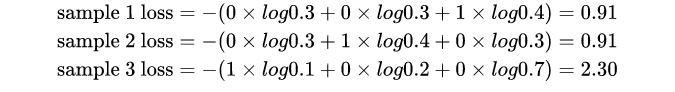

对所有样本的loss求平均：

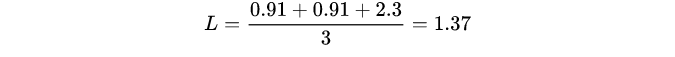

模型2：

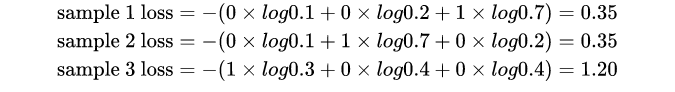

对所有样本的loss求平均：

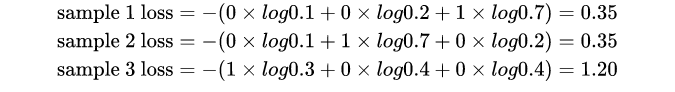

### 优化器

##### tf.keras.optimizers
class Adadelta: Optimizer that implements the Adadelta algorithm.

class Adagrad: Optimizer that implements the Adagrad algorithm.

class Adam: Optimizer that implements the Adam algorithm.

class Adamax: Optimizer that implements the Adamax algorithm.

class Ftrl: Optimizer that implements the FTRL algorithm.

class Nadam: Optimizer that implements the NAdam algorithm.

class Optimizer: Base class for Keras optimizers.

class RMSprop: Optimizer that implements the RMSprop algorithm.

class SGD: Gradient descent (with momentum) optimizer.

###  梯度下降法(Gradient Descent)
梯度下降法是最基本的一类优化器，目前主要分为三种梯度下降法：标准梯度下降法(GD, Gradient Descent)，随机梯度下降法(SGD, Stochastic Gradient Descent)及批量梯度下降法(BGD, Batch Gradient Descent)。

1. 标准梯度下降法(GD)

假设要学习训练的模型参数为$W$，代价函数为$J(W)$，则代价函数关于模型参数的偏导数即相关梯度为$\Delta J(W)$，学习率为$\eta_t $，则使用梯度下降法更新参数为：


$$ W_{t+1} = W_t - \eta_t \Delta J(W_t)$$

其中，$ W_t$表示$t$时刻的模型参数。

从表达式来看，模型参数的更新调整，与代价函数关于模型参数的梯度有关，即沿着梯度的方向不断减小模型参数，从而最小化代价函数。

基本策略可以理解为”在有限视距内寻找最快路径下山“，因此每走一步，参考当前位置最陡的方向(即梯度)进而迈出下一步。可以形象的表示为：
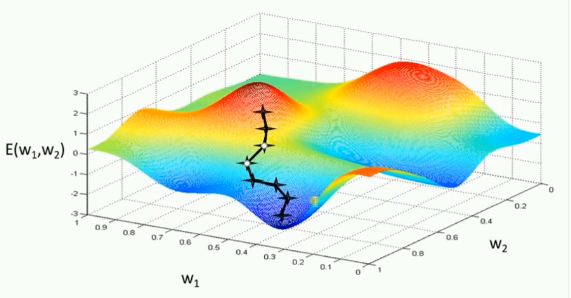

评价：标准梯度下降法主要有两个缺点:

- 训练速度慢：每走一步都要要计算调整下一步的方向，下山的速度变慢。在应用于大型数据集中，每输入一个样本都要更新一次参数，且每次迭代都要遍历所有的样本。会使得训练过程及其缓慢，需要花费很长时间才能得到收敛解。
- 容易陷入局部最优解：由于是在有限视距内寻找下山的反向。当陷入平坦的洼地，会误以为到达了山地的最低点，从而不会继续往下走。所谓的局部最优解就是鞍点。落入鞍点，梯度为0，使得模型参数不在继续更新。


2. 批量梯度下降法(BGD)

假设批量训练样本总数为$ n$，每次输入和输出的样本分别为$X^{(i)},Y^{(i)}$，模型参数为$W$，代价函数为$J(W)$，每输入一个样本$i$代价函数关于$W$的梯度为$ \Delta J_i(W_t, X^{(i)}, Y^{(i)})$，学习率为$\eta_t$，则使用批量梯度下降法更新参数表达式为：

$$ W_{t+1} = W_t - \eta_t \sum_{i=1}^n \Delta J_i(W_t, X^{(i)}, Y^{(i)})$$
其中，$Wt$表示$t$时刻的模型参数。

- 从表达式来看，模型参数的调整更新与全部输入样本的代价函数的和（即批量/全局误差）有关。即每次权值调整发生在批量样本输入之后，而不是每输入一个样本就更新一次模型参数。这样就会大大加快训练速度。

- 基本策略可以理解为，在下山之前掌握了附近的地势情况，选择总体平均梯度最小的方向下

- 批量梯度下降法比标准梯度下降法训练时间短，且每次下降的方向都很正确。

3. 随机梯度下降法(SGD)

对比批量梯度下降法，假设从一批训练样本$n$中随机选取一个样本$i_s$。模型参数为$W$，代价函数为$J(W)$，梯度为$\Delta J(W)$，学习率为$\eta_t $，则使用随机梯度下降法更新参数表达式为：

$$ W_{t+1} = W_t - \eta_t g_t $$

其中:
- $ g_t=\Delta J_{i_s}(W_t; X^{(i_s)};X^{(i_s)}), \ \ i_s \in \{1,2,...,n\}$表示随机选择的一个梯度方向，$W_t$表示$t$时刻的模型参数。
- $E(g_t) = \Delta J(W_t)$，这里虽然引入了随机性和噪声，但期望仍然等于正确的梯度下降。

基本策略可以理解为随机梯度下降像是一个盲人下山，不用每走一步计算一次梯度，但是他总能下到山底，只不过过程会显得扭扭曲曲。

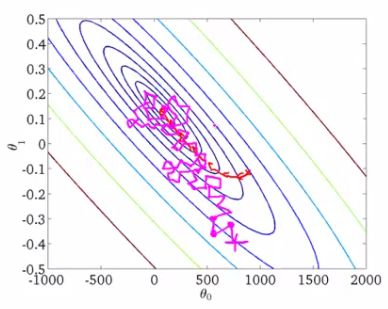


优点：

- 虽然SGD需要走很多步的样子，但是对梯度的要求很低（计算梯度快）。而对于引入噪声，大量的理论和实践工作证明，只要噪声不是特别大，SGD都能很好地收敛。
- 应用大型数据集时，训练速度很快。比如每次从百万数据样本中，取几百个数据点，算一个SGD梯度，更新一下模型参数。相比于标准梯度下降法的遍历全部样本，每输入一个样本更新一次参数，要快得多。

缺点：
- SGD在随机选择梯度的同时会引入噪声，使得权值更新的方向不一定正确。
- 此外，SGD也没能单独克服局部最优解的问题。

### 自适应学习率优化算法

自适应学习率优化算法针对于机器学习模型的学习率，传统的优化算法要么将学习率设置为常数要么根据训练次数调节学习率。极大忽视了学习率其他变化的可能性。然而，学习率对模型的性能有着显著的影响，因此需要采取一些策略来想办法更新学习率，从而提高训练速度。
目前的自适应学习率优化算法主要有：AdaGrad算法，RMSProp算法，Adam算法以及AdaDelta算法。


1.AdaGrad算法

AdaGrad算法，独立地适应所有模型参数的学习率，缩放每个参数反比于其所有梯度历史平均值总和的平方根。具有代价函数最大梯度的参数相应地有个快速下降的学习率，而具有小梯度的参数在学习率上有相对较小的下降。

AdaGrad算法优化策略一般可以表示为:

$$ W_{t+1}=W_t -\frac{\eta_0}{\sqrt{\sum_{t'=1}^t (g_{t',i})+\epsilon}} \odot g_{t,i}$$

假定一个多分类问题，i表示第i个分类，t表示第t迭代同时也表示分类i累计出现的次数。$\eta_0 $表示初始的学习率取值一般为0.01，$\epsilon$是一个取值很小的数（一般为1e-8）为了避免分母为0。$W_t$表示t时刻即第t迭代模型的参数，$g_{t,i}=\Delta J(W_{t, i})$表示t时刻，指定分类i，代价函数$J(\cdot)$关于$ W$ 的梯度。
- 从表达式可以看出，对出现比较多的类别数据，Adagrad给予越来越小的学习率，而对于比较少的类别数据，会给予较大的学习率。因此Adagrad适用于数据稀疏或者分布不平衡的数据集。
- Adagrad 的主要优势在于不需要人为的调节学习率，它可以自动调节；缺点在于，随着迭代次数增多，学习率会越来越小，最终会趋近于0。

2. RMSProp算法

RMSProp算法修改了AdaGrad的梯度积累为指数加权的移动平均，使得其在非凸设定下效果更好。

RMSProp算法的一般策略可以表示为：

$$ \Delta W_{AdaGrad, \ t} = - \frac{\eta_0}{\sqrt{\sum_{t'=1}^t (g_{t',i})+\epsilon}} \odot g_t\\ \Delta W_{RMSProp, \ t} =- \frac{\eta_0}{\sqrt{E[g^2]_t+\epsilon}} \odot g_t $$

其中
- $W_t$表示$t$时刻即第$t$迭代模型的参数，$g_t=\Delta J(W_t)$表示$t$次迭代代价函数关于WW的梯度大小，$E[g^2]_t$表示前$t$次的梯度平方的均值。$\alpha$表示动力（通常设置为0.9），$\eta_0 $表示全局初始学习率。$\epsilon$是一个取值很小的数（一般为1e-8）为了避免分母为0。
- RMSProp借鉴了Adagrad的思想，观察表达式，分母为$\sqrt{E[g^2]_t+\epsilon}$。由于取了个加权平均，避免了学习率越来越低的的问题，而且能自适应地调节学习率。
- RMSProp算法在经验上已经被证明是一种有效且实用的深度神经网络优化算法。目前它是深度学习从业者经常采用的优化方法之一。


3.  AdaDelta算法

思想：AdaGrad算法和RMSProp算法都需要指定全局学习率，AdaDelta算法结合两种算法每次参数的更新步长即：

$$\Delta W_{AdaGrad, \ t} = - \frac{\eta_0}{\sqrt{\sum_{t'=1}^t (g_{t',i})+\epsilon}} \odot g_t\\ \Delta W_{RMSProp, \ t} =- \frac{\eta_0}{\sqrt{E[g^2]_t+\epsilon}} \odot g_t $$

AdaDelta算法策略可以表示为：

$$ \left\{ \begin{aligned} & E[g^2]_t = \alpha  E[g^2]_{t-1} + (1-\alpha)g_t^2  \\ & \Delta W_t = - \frac{\sqrt{\sum_{i=1}^{t-1}\Delta W_i }}{\sqrt{E[g^2]_t+\epsilon}}  \\ &W_{t+1} = W_t + \Delta W_t \end{aligned} \right.$$

其中$W_t$为第$t$次迭代的模型参数，$g_t=\Delta J(W_t)$为代价函数关于WW的梯度。$E[g^2]_t$表示前$t$次的梯度平方的均值。$\sum_{i=1}^{t-1}\Delta W_i$表示前$t−1$次模型参数每次的更新步长累加求根。
- 从表达式可以看出，AdaDelta不需要设置一个默认的全局学习率。


评价：

- 在模型训练的初期和中期，AdaDelta表现很好，加速效果不错，训练速度快。
- 在模型训练的后期，模型会反复地在局部最小值附近抖动。

4. Adam算法

首先，Adam中动量直接并入了梯度一阶矩（指数加权）的估计。其次，相比于缺少修正因子导致二阶矩估计可能在训练初期具有很高偏置的RMSProp，Adam包括偏置修正，修正从原点初始化的一阶矩（动量项）和（非中心的）二阶矩估计。

AdaDelta算法策略可以表示为：

$$ \left\{ \begin{aligned} & m_t = \beta_1m_{t-1}+(1-\beta_1)g_t \\& v_t = \beta_2v_{t-1}+(1-\beta_2)g_t^2  \\ & \hat{m}_t = \frac{m_t}{1-\beta_1^t}, \ \  \hat{v}_t = \frac{v_t}{1-\beta_2^t} \\ & W_{t+1} = W_t -\frac{\eta}{\sqrt{\hat{v}_t}+\epsilon}\hat{m}_t\end{aligned} \right. $$

其中，$m_t$和$v_t$分别为一阶动量项和二阶动量项。$\beta_1, \beta_2$为动力值大小通常分别取0.9和0.999；$\hat{m}_t , \hat{v}_t$分别为各自的修正值。

$W_t$表示$t$时刻即第$t$迭代模型的参数，$g_t=\Delta J(W_t)$表示$t$次迭代代价函数关于WW的梯度大小，$\epsilon$是一个取值很小的数（一般为1e-8）为了避免分母为0。

### 各种优化器的比较

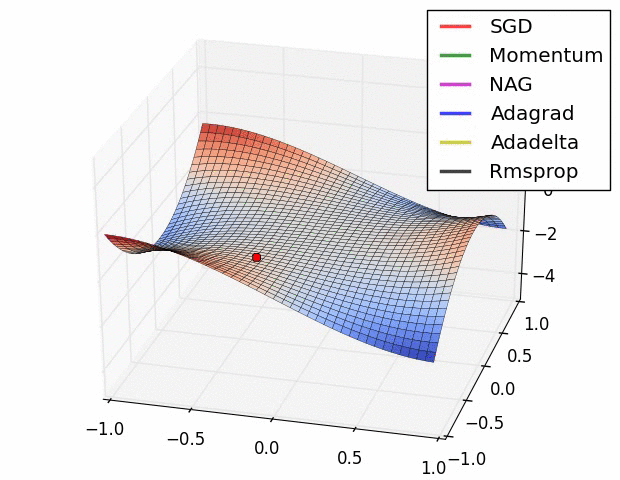

上图描述了在一个曲面上，6种优化器的表现，从中可以大致看出：

- 下降速度：

三个自适应学习优化器Adagrad、RMSProp与AdaDelta的下降速度明显比SGD要快，其中，Adagrad和RMSProp齐头并进，要比AdaDelta要快。
两个动量优化器Momentum和NAG由于刚开始走了岔路，初期下降的慢；随着慢慢调整，下降速度越来越快，其中NAG到后期甚至超过了领先的Adagrad和RMSProp。

- 下降轨迹：

SGD和三个自适应优化器轨迹大致相同。两个动量优化器初期走了“岔路”，后期也调整了过来。


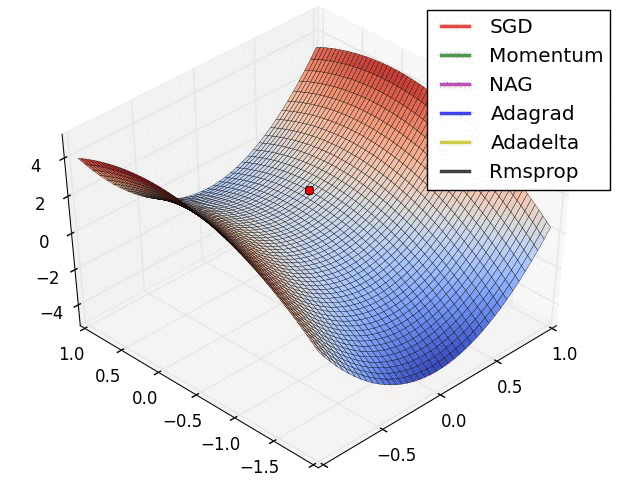

上图在一个存在鞍点的曲面，比较6中优化器的性能表现，从图中大致可以看出：

- 三个自适应学习率优化器没有进入鞍点，其中，AdaDelta下降速度最快，Adagrad和RMSprop则齐头并进。

- 两个动量优化器Momentum和NAG以及SGD都顺势进入了鞍点。但两个动量优化器在鞍点抖动了一会，就逃离了鞍点并迅速地下降，后来居上超过了Adagrad和RMSProp。

- 很遗憾，SGD进入了鞍点，却始终停留在了鞍点，没有再继续下降。

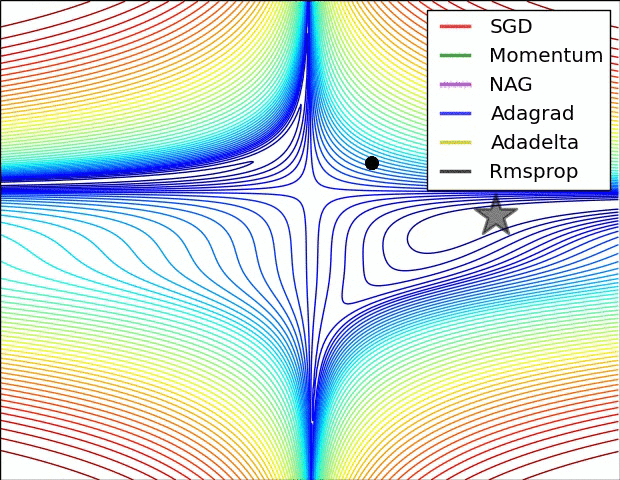

上图比较了6种优化器收敛到目标点（五角星）的运行过程，从图中可以大致看出：

在运行速度方面

两个动量优化器Momentum和NAG的速度最快，其次是三个自适应学习率优化器AdaGrad、AdaDelta以及RMSProp，最慢的则是SGD。

在收敛轨迹方面

- 两个动量优化器虽然运行速度很快，但是初中期走了很长的”岔路”。
- 三个自适应优化器中，Adagrad初期走了岔路，但后来迅速地调整了过来，但相比其他两个走的路最长；AdaDelta和RMSprop的运行轨迹差不多，但在快接近目标的时候，RMSProp会发生很明显的抖动。
- SGD相比于其他优化器，走的路径是最短的，路子也比较正。
